In [1]:
import os
import tensorflow as tf
import requests
from datasets import load_dataset
import itertools
from tqdm import tqdm
from io import BytesIO
from PIL import Image

2024-10-02 19:18:40.268440: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 19:18:40.291557: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 19:18:40.298575: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 19:18:40.315087: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 19:18:41.388852: W tensorflow/compiler/tf2

# Constructing DataComp-Recap tfrecord files

In [1]:
def download_image(url):
    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()
        img = Image.open(BytesIO(response.content))
        img = img.convert('RGB')  # Convert to RGB to ensure consistency
        width, height = img.size
        img_byte_arr = BytesIO()
        img.save(img_byte_arr, format='JPEG')
        return img_byte_arr.getvalue(), width, height
    except Exception as e:
        print(f"Error downloading {url}: {e}")
        return None, None, None

def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _int64_feature(value):
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

def create_example(sample):
    image_data, width, height = download_image(sample['url'])
    if image_data is None:
        return None
    
    feature = {
        'image': _bytes_feature(image_data),
        'url': _bytes_feature(sample['url'].encode('utf-8')),
        're_caption': _bytes_feature(sample['re_caption'].encode('utf-8')),
        'org_caption': _bytes_feature(sample['org_caption'].encode('utf-8')),
        'width': _int64_feature(width),
        'height': _int64_feature(height),
    }
    return tf.train.Example(features=tf.train.Features(feature=feature))

def convert_to_tfrecord(dataset, output_file):
    with tf.io.TFRecordWriter(output_file) as writer:
        for sample in tqdm(dataset):
            tf_example = create_example(sample)
            if tf_example is not None:
                writer.write(tf_example.SerializeToString())

# Load the dataset
ds = load_dataset("UCSC-VLAA/Recap-DataComp-1B", split="preview", streaming=True)

# Take the first n samples
limited_ds = itertools.islice(ds, 100)

# Convert the limited dataset to TFRecord
out_dir = "/home/austinwang/tensorflow_datasets/downloads"
out_path = os.path.join(out_dir, "datacomp_recap_train.tfrecord")
if not os.path.exists(out_dir): os.makedirs(out_dir) 
convert_to_tfrecord(limited_ds, out_path)

2024-09-24 05:35:35.784348: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-24 05:35:35.807048: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-24 05:35:35.814022: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-24 05:35:35.829488: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-09-24 05:35:36.882559: W tensorflow/compiler/tf2

Error downloading https://media.istockphoto.com/vectors/christmas-balls-with-stripes-and-snowflakes-new-year-tree-decoration-vector-id621497892: 400 Client Error: Bad Request for url: https://media.istockphoto.com/vectors/christmas-balls-with-stripes-and-snowflakes-new-year-tree-decoration-vector-id621497892


17it [00:06,  2.98it/s]

Error downloading http://img.cricketworld.com/images/c-045629/sharuban-kanthasamy.jpg: 403 Client Error: Forbidden for url: http://img.cricketworld.com/images/c-045629/sharuban-kanthasamy.jpg


23it [00:08,  3.67it/s]

Error downloading https://www.northernsoul.me.uk/wp-content/uploads/2021/03/Lennie-Henry-pic-300x225.jpg: 404 Client Error: Not Found for url: https://www.northernsoul.me.uk/wp-content/uploads/2021/03/Lennie-Henry-pic-300x225.jpg


34it [00:09,  8.22it/s]

Error downloading https://s3.envato.com/files/251112560/IMG_0989.jpg: 403 Client Error: Forbidden for url: https://s3.envato.com/files/251112560/IMG_0989.jpg


40it [00:10,  8.09it/s]

Error downloading https://i2.wp.com/noticieros.televisa.com/wp-content/uploads/2017/11/moodys-rebaja-la-nota-crediticia-de-pdvsa-por-incumplimiento-de-pago.jpg?resize=340%2C194&quality=95&ssl=1: 400 Client Error: Bad Request for url: https://i2.wp.com/noticieros.televisa.com/wp-content/uploads/2017/11/moodys-rebaja-la-nota-crediticia-de-pdvsa-por-incumplimiento-de-pago.jpg?resize=340%2C194&quality=95&ssl=1


49it [00:13,  3.38it/s]

Error downloading https://www.vicky-mar.com/wp-content/uploads/nc/vickymar/catalogs/mums-of-brides/8058-D-02-P.jpg: 404 Client Error: Not Found for url: https://www.vicky-mar.com/wp-content/uploads/nc/vickymar/catalogs/mums-of-brides/8058-D-02-P.jpg


51it [00:13,  3.02it/s]

Error downloading https://cdn.trendhunterstatic.com/phpthumbnails/193/193415/193415_3_80.jpeg: 404 Client Error: Not Found for url: https://cdn.trendhunterstatic.com/phpthumbnails/193/193415/193415_3_80.jpeg


56it [00:14,  4.78it/s]

Error downloading https://www.specsserver.com/CACHE/FROGQWYXAOEU.PNG?width=220&height=220&ccid=x8dff32d: 403 Client Error: Forbidden for url: https://www.specsserver.com/CACHE/FROGQWYXAOEU.PNG?width=220&height=220&ccid=x8dff32d


60it [00:15,  6.44it/s]

Error downloading https://www.tasteofhome.com/wp-content/uploads/2018/01/exps35009_RDS2028402D05_06_6b_WEB-2.jpg?fit=300,300: 403 Client Error: Forbidden for url: https://www.tasteofhome.com/wp-content/uploads/2018/01/exps35009_RDS2028402D05_06_6b_WEB-2.jpg?fit=300,300


79it [00:18,  6.09it/s]

Error downloading http://www.pumpupyourbook.com/wp-content/uploads/2010/06/The-Book-of-Unholy-Mischief-183x300.jpg: 406 Client Error: Not Acceptable for url: http://www.pumpupyourbook.com/wp-content/uploads/2010/06/The-Book-of-Unholy-Mischief-183x300.jpg


80it [00:19,  4.72it/s]

Error downloading http://www.supercoloring.com/sites/default/files/styles/coloring_medium/public/cif/2016/06/citroen-2-cv-coloring-page.png: 403 Client Error: Forbidden for url: https://www.supercoloring.com/sites/default/files/styles/coloring_medium/public/cif/2016/06/citroen-2-cv-coloring-page.png


87it [00:31,  1.52s/it]

Error downloading https://www.southerntrophyshop.com/images/p150x150/executive-gift-awards-BrNmFh.jpg: HTTPConnectionPool(host='107.167.170.110', port=80): Max retries exceeded with url: / (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7f53d9b79030>, 'Connection to 107.167.170.110 timed out. (connect timeout=10)'))


100it [00:34,  2.89it/s]


# Build TFDS in terminal

In [ ]:
"""
export TFDS_NAME=datacomp_recap
# export TFDS_DATA_DIR=gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets
export TFDS_DATA_DIR=~/tensorflow_datasets
export TFDS_BUILDER_DIR=~/austin_big_vision/big_vision/datasets
tfds build $TFDS_BUILDER_DIR/$TFDS_NAME --data_dir $TFDS_DATA_DIR
"""

# Inspect the tfds

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
dataset = tfds.load('datacomp_recap/50M:1.0.0', split='train', data_dir='gs://us-central2-storage/tensorflow_datasets/tensorflow_datasets')
len(dataset)

41598460

In [6]:
sample = next(iter(dataset))

i = 0


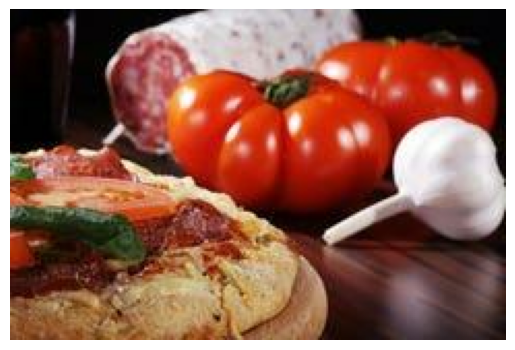

original caption: b'Pizza Stock Photos'
recaptioned caption: b'A rustic Italian pizza with tomato slices and basil leaves is served on a wooden board, accompanied by a whole tomato and a piece of prosciutto on a wooden cutting board.'
i = 1


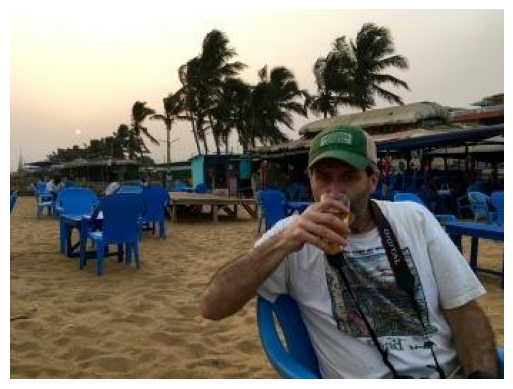

original caption: b'Jim Lundy enjoys a Flag beer on the beach.'
recaptioned caption: b'A man is sitting on a blue chair at a beachside restaurant, holding a glass of beer. He is wearing a white t-shirt with a green cap and a camera strap around his neck. The restaurant has blue chairs and tables, and there are umbrellas and palm trees in the background. The sky is hazy, and the beach is visible in the foreground.'
i = 2


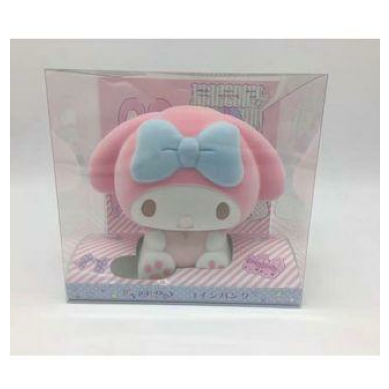

original caption: b'Original Sanrio My Melody Coin Bank / Tabung'
recaptioned caption: b'A plush toy of Hello Kitty is displayed in a clear plastic box. The plush toy has a pink body with a white face, ears, and paws. It wears a blue bow on its head. The box has a pink background with a Hello Kitty illustration and Japanese text. The plush toy is placed on a striped pink and white background inside the box.'
i = 3


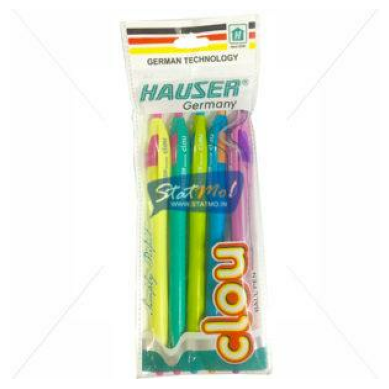

original caption: b'Hauser Clou Ball Pen by StatMo.in'
recaptioned caption: b"A pack of Staedtler Clou pencils in various colors is displayed against a white background. The pencils are neatly arranged in a row, with each color having a distinct hue. The pack is labeled 'HAUSER GERMANY' and 'STAEDTLER Clou'. The pencils are encased in a plastic wrapper with a green and yellow label featuring the brand name and logo."
i = 4


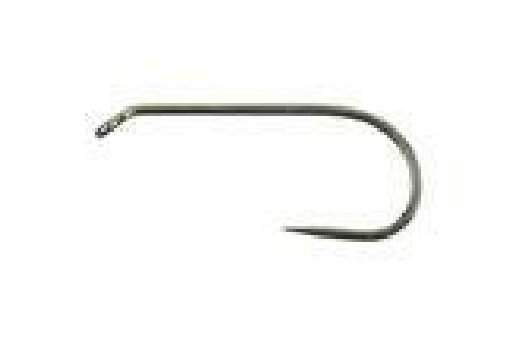

original caption: b'Stucki Thun Single Hook 1509-BR o.W. - Angelhaken m. Oehr'
recaptioned caption: b'A single fishing hook with a curved shank and a sharp point is displayed against a white background.'
i = 5


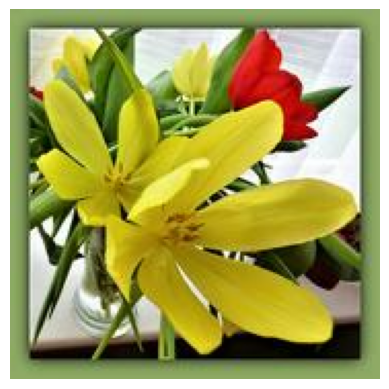

original caption: b'31st Jan 2021 - Tulips -2'
recaptioned caption: b'A bouquet of yellow and red tulips in a clear glass vase, placed on a white surface with a blurred background.'
i = 6


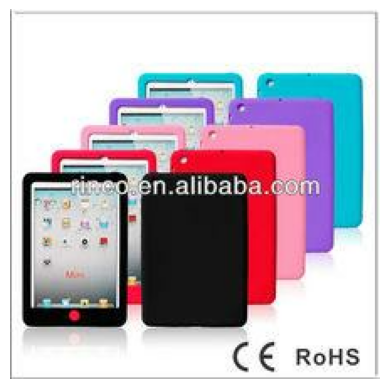

original caption: b'Bean Soft Shell Silicone back Case Cover for Apple Ipad MINI 7&quot;tablet'
recaptioned caption: b'A collection of colorful tablet cases is displayed in a row. The cases come in various colors such as red, pink, purple, blue, and black. Each case has a unique design and is placed on a white surface. The tablets themselves are not visible, but the cases are designed to fit a tablet with a screen that has a black bezel and a red home button at the bottom.'
i = 7


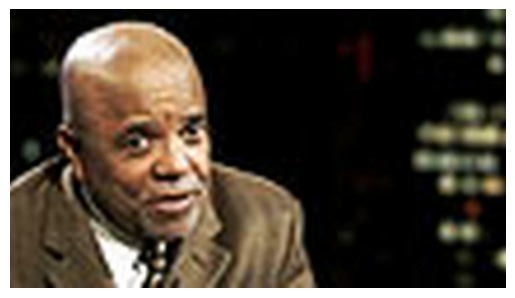

original caption: b'Berry Gordy (Part 2): Monday, 7/28 image'
recaptioned caption: b'A man with a bald head is wearing a brown suit and a white shirt with a tie. He is looking to the side with a serious expression. The background is dark with a blurred cityscape at night, featuring illuminated buildings and a red light in the upper right corner.'
i = 8


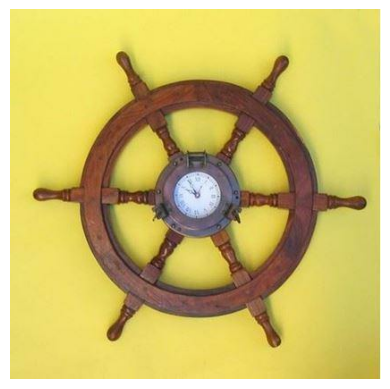

original caption: b'Iron Porthole Clock Wooden Ship Wheel 24 Inch'
recaptioned caption: b"A wooden ship's wheel with a clock face in the center is mounted on a yellow wall. The clock shows a time of approximately 10:10. The wheel has a dark brown color with lighter brown accents and is adorned with brass details. The wall has a plain yellow background."
i = 9


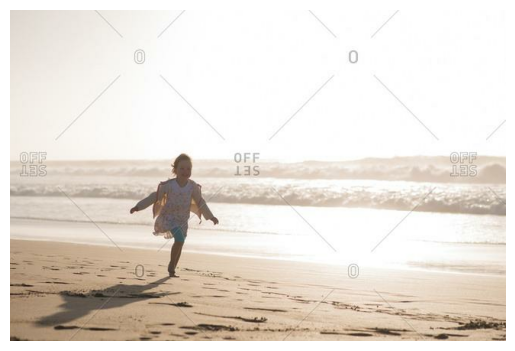

original caption: b'Laughing little girl running on the beach along the ocean'
recaptioned caption: b'A young girl is running on a sandy beach with the ocean in the background. The sky is clear with a few clouds, and the sun is shining brightly. The girl is wearing a white dress with a floral pattern and has her hair tied back. There are footprints in the sand, and the ocean waves are gently crashing onto the shore.'


In [11]:
count = 10
for i,batch in enumerate(dataset):
    print(f"i = {i}")
    # img = tf.image.decode_jpeg(batch['image'][0])
    img = batch['image']
    plt.imshow(img.numpy())
    plt.axis('off')
    plt.show()
    print(f"original caption: {batch['org_caption'].numpy()}")
    print(f"recaptioned caption: {batch['re_caption'].numpy()}")
    count -= 1
    if count == 0:
        break

# Playground

In [3]:
ds = load_dataset("UCSC-VLAA/Recap-DataComp-1B", split="train", streaming=True)
num_samples = 3
for i, sample in enumerate(tqdm(ds.take(num_samples), total=num_samples, desc="Generating samples")):
    print(f"Sample {i}: {sample}")

Generating samples: 100%|██████████| 3/3 [00:01<00:00,  2.21it/s]

Sample 0: {'url': 'https://images-na.ssl-images-amazon.com/images/I/41kzIaKFE+L._AC._SR180,230.jpg', 're_caption': 'A modern coffee machine with a digital display and two white coffee cups filled with coffee is shown. The machine has a stainless steel finish and is accompanied by a milk frothing pitcher with a white liquid inside. The coffee machine is placed on a surface with a white background.', 'org_caption': 'Saeco Xelsis Automatic Espresso Machine, SM7685/04, Stainless Steel', 'sha256': '501ac5e3066ff4cdad97dafd8916a65673b5e6d961c6e31e59dbeadd7fd7e3c7', 'key': '000000000008', 're_clip_score': 0.0, 'org_clip_score': 0.0, 're_length': 50, 'org_length': 8, 're_gpt4v_score': 0, 'org_gpt4v_score': 0}
Sample 1: {'url': 'https://d2j6dbq0eux0bg.cloudfront.net/images/39097340/1998437688.jpg', 're_caption': 'A row of identical figures in black suits and ties is standing in a line against a white background.', 'org_caption': 'O 6-Car Flat End Offset Hopper Car Set, B&O 727022', 'sha256': '3